<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
## Write your code here
summary = pd.DataFrame(df.dtypes, columns=['Data Type'])
summary['Non-Null Count'] = df.count()
summary['Missing Values'] = df.isnull().sum()
with pd.option_context('display.max_rows', 200):
    print(summary.sort_values(by='Missing Values', ascending=False))


                               Data Type  Non-Null Count  Missing Values
AINextMuch less integrated        object            1148           64289
AINextLess integrated             object            2355           63082
AINextNo change                   object           12498           52939
AINextMuch more integrated        object           13438           51999
EmbeddedAdmired                   object           16733           48704
EmbeddedWantToWorkWith            object           17600           47837
EmbeddedHaveWorkedWith            object           22214           43223
ConvertedCompYearly              float64           23435           42002
AIToolNot interested in Using     object           24414           41023
AINextMore integrated             object           24428           41009
Knowledge_9                       object           27635           37802
Frequency_3                       object           27710           37727
Knowledge_8                       object           

In [4]:
cols = ['Employment', 'YearsCodePro', 'JobSat', 'RemoteWork']
summary.loc[cols]

,Data Type,Non-Null Count,Missing Values
Employment,object,65437,0
YearsCodePro,object,51610,13827
JobSat,float64,29126,36311
RemoteWork,object,54806,10631


#### Strategy to fill or drop these values
Taking each column individually, missing values should be dropped rather than replaced (filled) with some arbitrary values, whether mean or mode or most frequent value, all of which would skew the data distribution.

If, however, analysis is to be done using more than one column, it may be necessary to fill missing values in each column in order to retain a sufficient number of rows (data points) for meaningful results.  The strategy to fill depends on the data type of the column:
- categorical (Data Type=object): use the most frequent value
- numerical (Data Type=int or float): use the mean

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [5]:
## Write your code here
# clean up, drop NAs
df2 = df[['YearsCodePro', 'JobSat']].dropna()
df2['CodingYears'] = df2['YearsCodePro'].dropna().replace({'Less than 1 year': '1', 'More than 50 years': '50'}).astype(int)
df2['JobSat'] = df2['JobSat'].astype(int)
#sns.scatterplot(x="CodingYears", y="JobSat", data=df2)
df2.head()

,YearsCodePro,JobSat,CodingYears
12,12,8,12
15,27,5,27
18,10,10,10
20,Less than 1 year,6,1
22,18,9,18


Number of JobSat scores
 Experience
0-5      10249
5-10      7737
10-20     6899
>20       3471
Name: count, dtype: int64
Median of JobSat scores
 Experience
0-5      7.0
5-10     7.0
10-20    8.0
>20      8.0
Name: JobSat, dtype: float64


C:\Users\clifford\AppData\Local\Temp\ipykernel_10256\2537633269.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print('Median of JobSat scores\n', df2.groupby('Experience')['JobSat'].median())


<Axes: xlabel='Experience', ylabel='JobSat'>

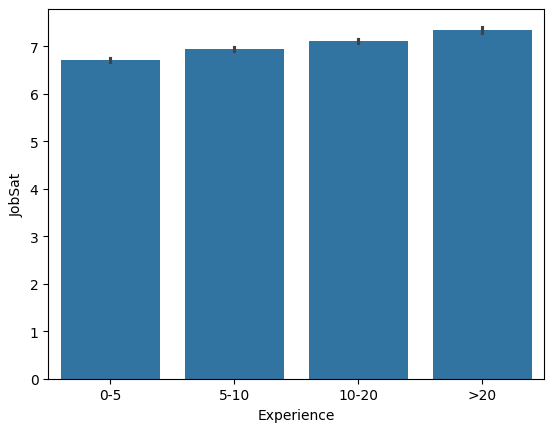

In [107]:
# Define custom bin edges and labels
bins = [0, 5, 10, 20, 50]
ranges = ['0-5', '5-10', '10-20', '>20']
levels = ["Beginner", "Intermediate", "Advanced", "Guru"]

# Apply binning and add the results to a new column
df2['Experience'] = pd.cut(df2['CodingYears'], bins, labels=ranges)
print('Number of JobSat scores\n', df2['Experience'].value_counts())
print('Median of JobSat scores\n', df2.groupby('Experience')['JobSat'].median())
sns.barplot(data=df2, x='Experience', y='JobSat')

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


<Axes: xlabel='JobSat', ylabel='count'>

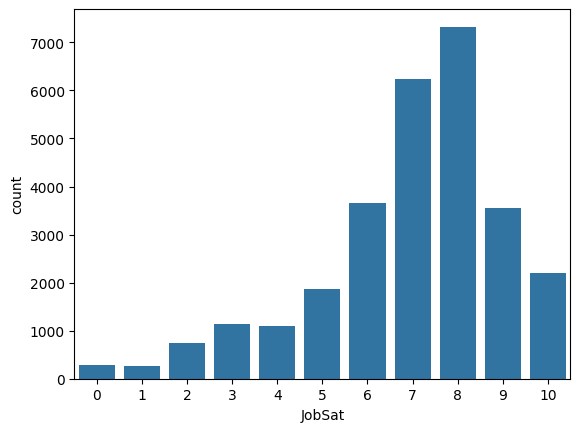

In [8]:
## Write your code here
sns.countplot(data=df2, x='JobSat')

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


In [9]:
## Write your code here
df.groupby('RemoteWork')['RemoteWork'].value_counts()

RemoteWork
Hybrid (some remote, some in-person)    23015
In-person                               10960
Remote                                  20831
Name: count, dtype: int64

In [10]:
df['RemoteWork'] = df['RemoteWork'].replace('Hybrid (some remote, some in-person)', 'Hybrid')
df.groupby('RemoteWork')['RemoteWork'].value_counts()

RemoteWork
Hybrid       23015
In-person    10960
Remote       20831
Name: count, dtype: int64

In [11]:
# one-hot encode Employment
df_encoded = df['Employment'].str.get_dummies(sep=';')
df3 = pd.concat([df_encoded, df[['RemoteWork']]], axis=1).dropna()
df3

,"Employed, full-time","Employed, part-time",I prefer not to say,"Independent contractor, freelancer, or self-employed","Not employed, and not looking for work","Not employed, but looking for work",Retired,"Student, full-time","Student, part-time",RemoteWork
0,1,0,0,0,0,0,0,0,0,Remote
1,1,0,0,0,0,0,0,0,0,Remote
2,1,0,0,0,0,0,0,0,0,Remote
6,1,0,0,0,0,0,0,0,0,Remote
8,1,0,0,0,0,0,0,0,0,In-person
...,...,...,...,...,...,...,...,...,...,...
65431,1,0,0,0,0,0,0,0,0,Hybrid
65432,1,0,0,0,0,0,0,0,0,Remote
65433,1,0,0,0,0,0,0,0,0,Remote
65434,1,0,0,0,0,0,0,0,0,In-person


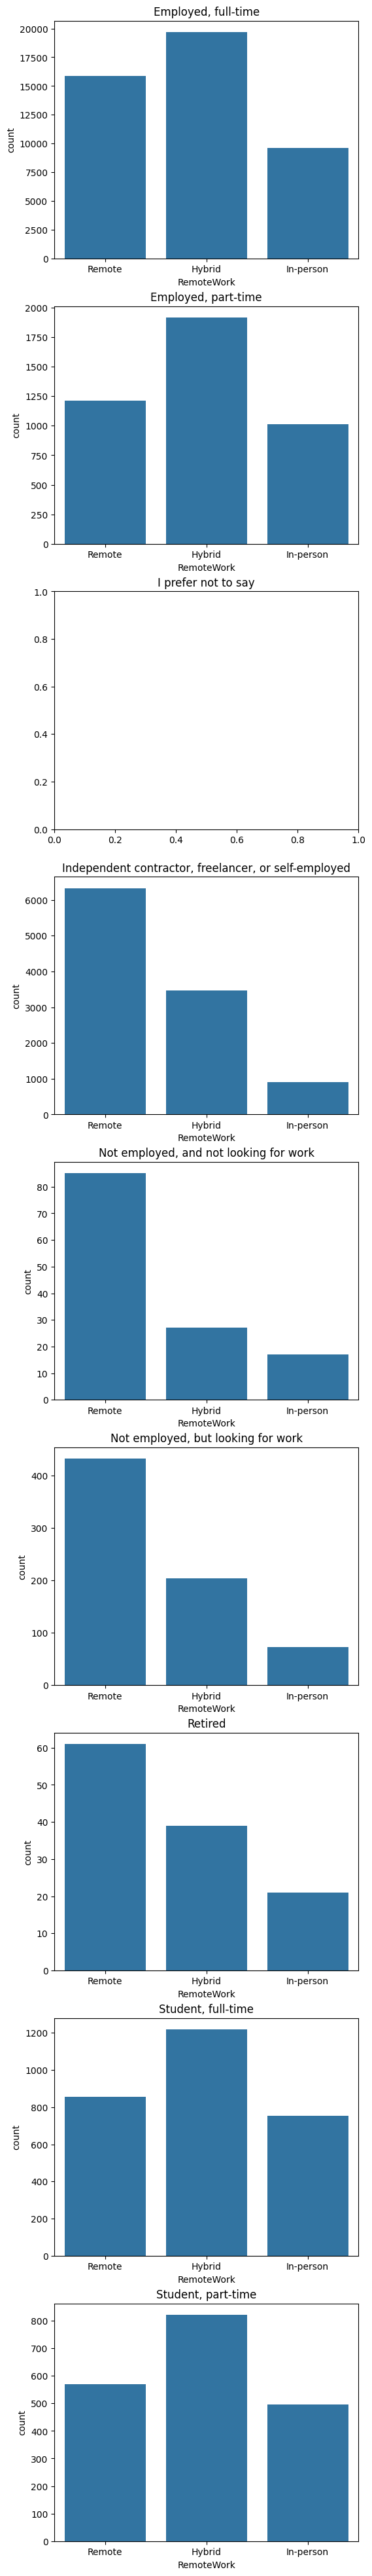

In [152]:
e_types = list(df_encoded.columns)
total = len(e_types)
fig, axes = plt.subplots(nrows=total, ncols=1, figsize=(6, 50))
for idx, name in zip(list(range(total)), e_types):
    sns.countplot(data=df3[df3[name] == 1], x='RemoteWork', order=['Remote','Hybrid','In-person'], ax=axes[idx])
    axes[idx].set_title(name)
    #print(idx, name)
plt.show()

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [42]:
## Write your code here
# one-hot encode Employment
df_encoded = df['LanguageHaveWorkedWith'].str.get_dummies(sep=';')
df4 = pd.concat([df_encoded, df[['Country']]], axis=1).dropna()
country_lang = df4.groupby('Country').sum()
country_lang

,Ada,Apex,Assembly,Bash/Shell (all shells),C,C#,C++,Clojure,Cobol,Crystal,Dart,Delphi,Elixir,Erlang,F#,Fortran,GDScript,Go,Groovy,HTML/CSS,Haskell,Java,JavaScript,Julia,Kotlin,Lisp,Lua,MATLAB,MicroPython,Nim,OCaml,Objective-C,PHP,Perl,PowerShell,Prolog,Python,R,Ruby,Rust,SQL,Scala,Solidity,Swift,TypeScript,VBA,Visual Basic (.Net),Zephyr,Zig
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,9,4,7,14,13,8,13,4,3,5,7,6,5,3,3,3,4,7,5,24,3,12,25,3,5,3,4,4,5,3,3,3,15,3,6,3,25,4,4,8,21,4,4,3,12,5,3,4,6
Albania,5,0,1,10,7,12,4,0,0,0,0,1,0,0,0,0,0,5,0,25,4,16,26,0,4,1,1,2,1,0,0,1,16,1,4,0,9,1,0,1,28,2,0,1,14,1,1,0,0
Algeria,3,1,7,9,14,14,9,0,0,1,14,4,1,0,0,1,2,0,0,52,0,13,53,2,7,0,3,2,0,0,0,0,20,1,7,1,37,1,0,3,35,0,0,1,32,1,0,0,1
Andorra,1,0,0,4,3,6,4,0,0,0,2,1,1,0,0,0,0,2,0,7,0,5,7,0,1,0,0,2,0,0,0,0,5,0,1,1,8,1,0,2,8,0,3,1,7,0,0,0,0
Angola,3,1,1,3,4,4,3,1,0,0,3,1,0,1,0,1,0,1,0,8,0,5,10,0,2,0,0,0,0,0,0,0,4,0,0,0,9,0,1,1,8,0,0,0,6,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Venezuela, Bolivarian Republic of...",1,0,1,18,10,12,11,1,0,0,1,2,1,1,1,1,1,6,2,43,1,16,53,0,5,1,7,3,0,0,0,0,24,0,8,0,25,1,3,3,33,2,0,1,25,6,6,0,0
Viet Nam,0,0,21,70,71,88,109,1,1,1,22,1,3,0,0,0,8,38,9,159,2,126,205,0,29,1,17,15,4,1,1,10,53,2,35,1,137,9,12,25,145,5,3,15,122,14,6,0,3
Yemen,1,0,0,3,2,7,5,0,0,0,6,1,0,0,0,0,0,0,0,12,0,4,12,0,2,0,0,1,0,0,0,0,6,0,2,2,10,0,1,0,8,0,0,0,8,2,2,0,0


In [43]:
country_lang.loc['Canada'].sort_values(ascending=False)

JavaScript                 1296
Python                     1118
HTML/CSS                   1097
SQL                        1073
Bash/Shell (all shells)     798
TypeScript                  796
C#                          603
Java                        571
C++                         488
C                           415
PowerShell                  352
PHP                         324
Rust                        309
Go                          308
Ruby                        170
Lua                         150
Kotlin                      141
Assembly                    115
Visual Basic (.Net)         109
R                           101
VBA                          98
Dart                         97
Swift                        92
MATLAB                       80
GDScript                     71
Groovy                       71
Perl                         67
Elixir                       66
Scala                        57
Objective-C                  52
Haskell                      48
MicroPyt

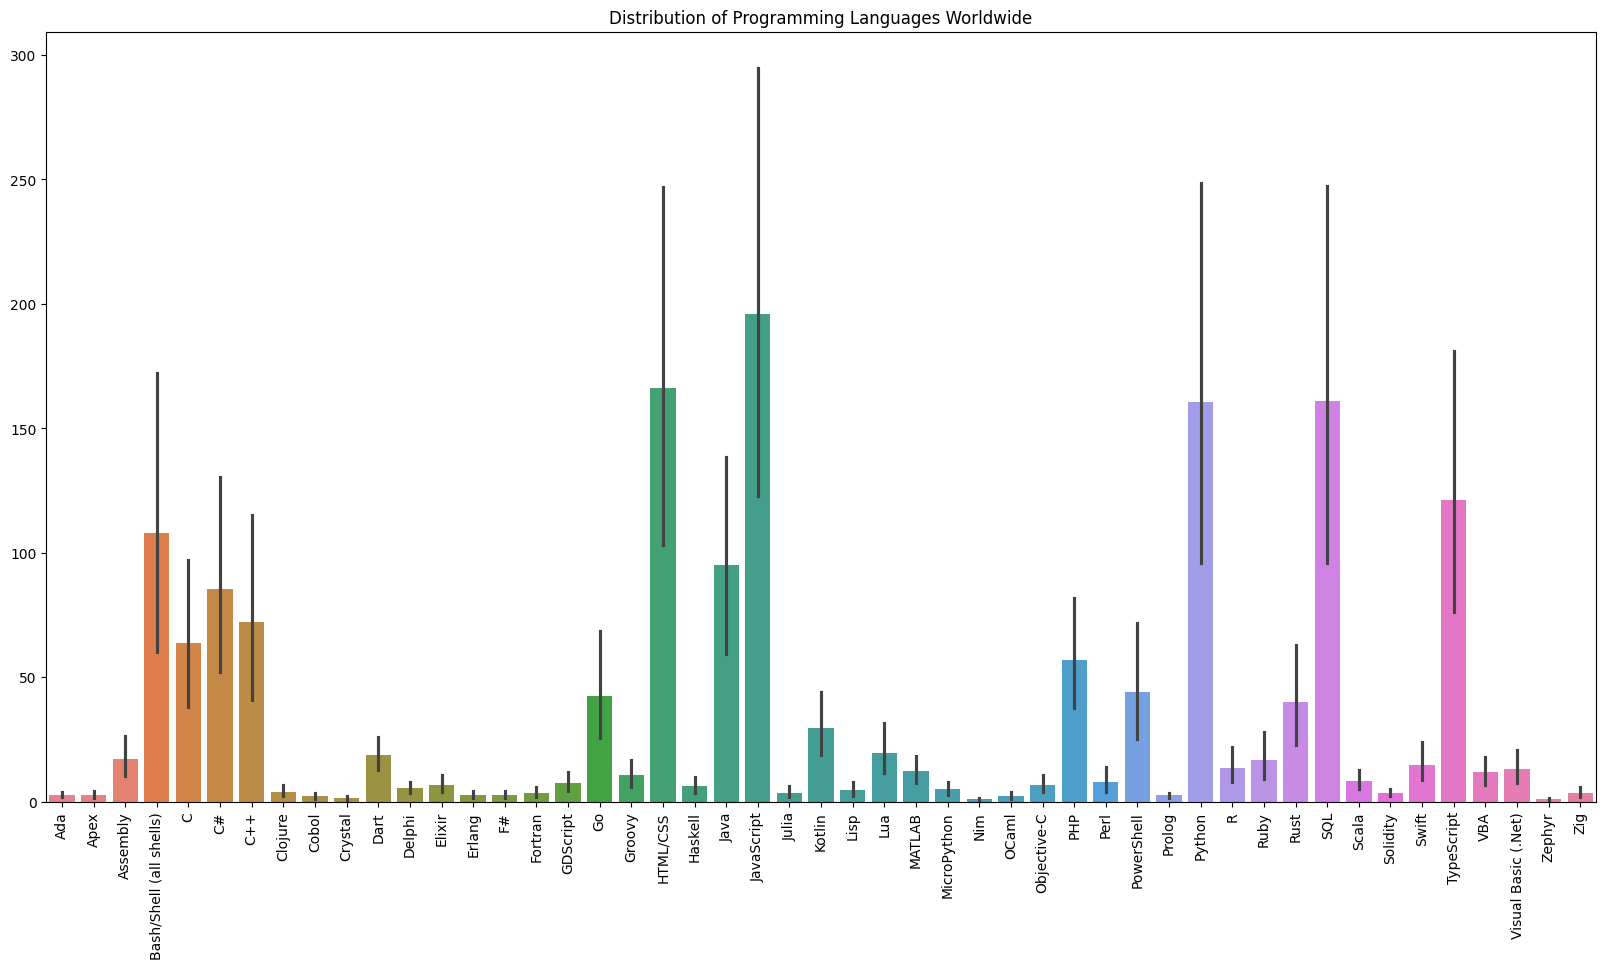

In [32]:
plt.figure(figsize=(20, 10))
sns.barplot(data=country_lang)
plt.xticks(rotation=90)
plt.title('Distribution of Programming Languages Worldwide')
plt.xticks(rotation=90)
plt.show()

In [154]:
# show countries in order of number of responses
with pd.option_context('display.max_rows', 200):
    print(country_lang.sum(axis=1).sort_values(ascending=False))

Country
United States of America                                61672
Germany                                                 27246
India                                                   20314
United Kingdom of Great Britain and Northern Ireland    17016
France                                                  11950
Canada                                                  11498
Ukraine                                                 10883
Poland                                                   8045
Netherlands                                              7912
Italy                                                    7876
Brazil                                                   7309
Australia                                                7064
Spain                                                    5786
Sweden                                                   5204
Switzerland                                              5073
Austria                                                  4553


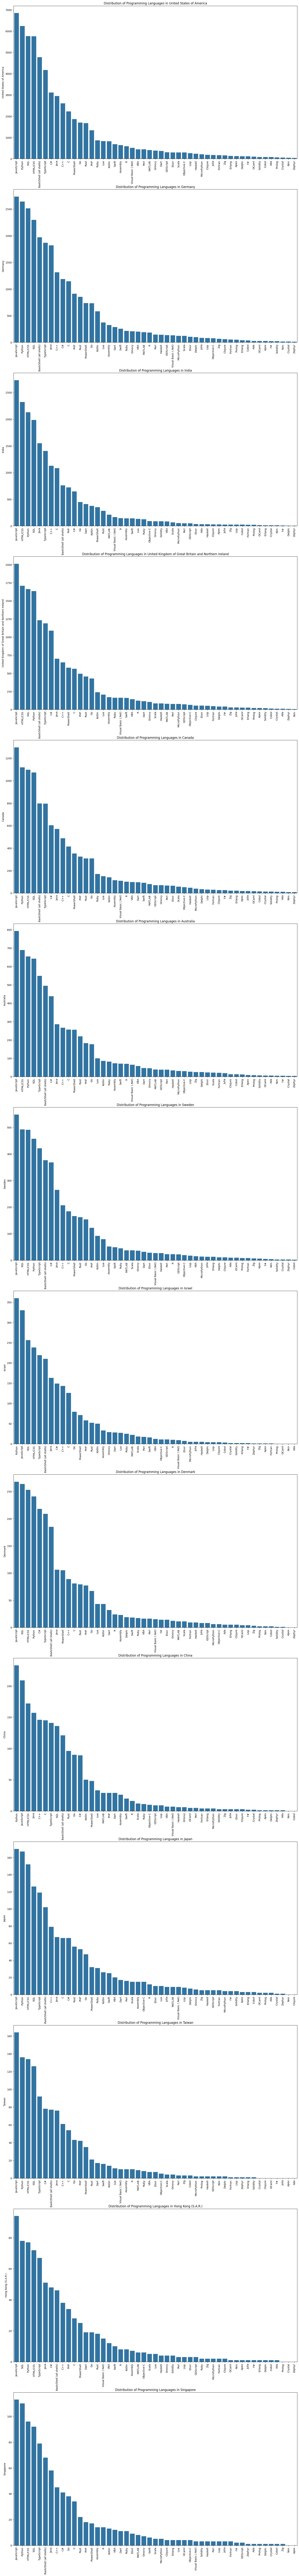

In [65]:
c_types = [
    'United States of America',
    'Germany',
    'India',
    'United Kingdom of Great Britain and Northern Ireland',
    #'France',
    'Canada',
    #'Ukraine',
    #'Poland',
    #'Netherlands',
    #'Italy',
    #'Brazil',
    'Australia',
    #'Spain',
    'Sweden',
    #'Switzerland',
    #'Austria',
    #'Russian Federation',
    #'Czech Republic',
    #'Belgium',
    'Israel',
    #'Turkey',
    'Denmark',
    #'Portugal',
    #'Mexico',
    #'Norway',
    #'Indonesia',
    'China',
    #'Finland',
    'Japan',
    'Taiwan',
    'Hong Kong (S.A.R.)',
    'Singapore',
]
total = len(c_types)
fig, axes = plt.subplots(nrows=total, ncols=1, figsize=(20, 180))
for idx, name in zip(list(range(total)), c_types):
    sns.barplot(data=country_lang.loc[name].sort_values(ascending=False), ax=axes[idx])
    axes[idx].tick_params(axis='x', rotation=90)
    axes[idx].set_title(f'Distribution of Programming Languages in {name}')
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


<Axes: xlabel='CodingYears', ylabel='JobSatPoints_1'>

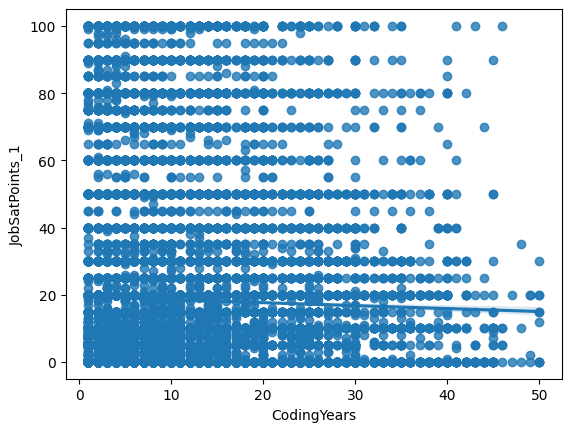

In [99]:
## Write your code here
#sns.regplot(data=df2, x='CodingYears', y='JobSat')
# instead of JobSat now take the JobSatPoints_1 column [but why not JobSatPoints_4 to JobSatPoints_11?]
df5 = df[['YearsCodePro', 'JobSatPoints_1']].dropna()
df5['CodingYears'] = df5['YearsCodePro'].dropna().replace({'Less than 1 year': '1', 'More than 50 years': '50'}).astype(int)
sns.regplot(data=df5, x='CodingYears', y='JobSatPoints_1')

<Axes: xlabel='CodingYears', ylabel='JobSatPoints_1'>

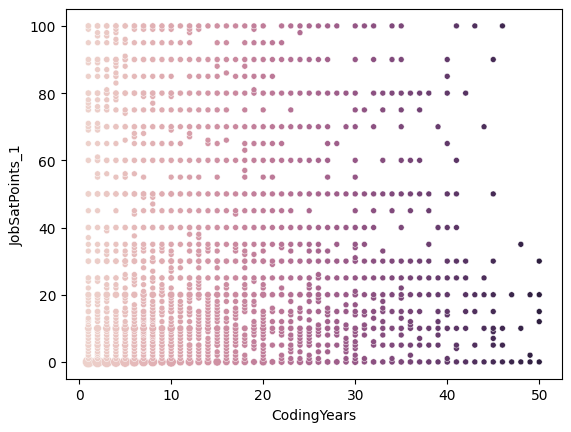

In [102]:
# due to the discrete nature of the years and coding score (both being integer), dots overlap and obscure their true quantity
# use bubble plot (i.e. dot size) to show the quantity of overlapping dots
#weighted = df2.groupby(['CodingYears', 'JobSat']).count().reset_index()
weighted = df5.groupby(['CodingYears', 'JobSatPoints_1']).count().reset_index()
#sns.scatterplot(data=weighted, x='CodingYears', y='JobSat', size='YearsCodePro', hue='CodingYears', legend=False)
sns.scatterplot(data=weighted, x='CodingYears', y='JobSatPoints_1', size='YearsCodePro', hue='CodingYears', legend=False)

<Axes: xlabel='CodingYears', ylabel='Count'>

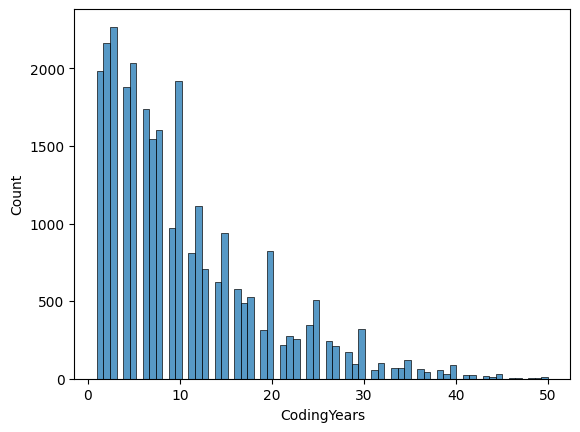

In [131]:
# just to confirm the distribution of coding years, with more responses toward fewer years
#sns.histplot(df2['CodingYears'])
sns.histplot(df5['CodingYears'])

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [116]:
## Write your code here
df_encoded = df['Employment'].str.get_dummies(sep=';')
df6 = pd.concat([pd.DataFrame(df['EdLevel'].replace({
    'Primary/elementary school': 'Primary',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'Secondary',
    'Some college/university study without earning a degree': 'Post-secondary',
    'Associate degree (A.A., A.S., etc.)': 'Associate',
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelor',
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Master',
    'Professional degree (JD, MD, Ph.D, Ed.D, etc.)': 'Professional',
})), df_encoded], axis=1).dropna()
df6.drop(df6[df6['EdLevel'] == 'Something else'].index, inplace=True)

In [117]:
df6

,EdLevel,"Employed, full-time","Employed, part-time",I prefer not to say,"Independent contractor, freelancer, or self-employed","Not employed, and not looking for work","Not employed, but looking for work",Retired,"Student, full-time","Student, part-time"
0,Primary,1,0,0,0,0,0,0,0,0
1,Bachelor,1,0,0,0,0,0,0,0,0
2,Master,1,0,0,0,0,0,0,0,0
3,Post-secondary,0,0,0,0,0,0,0,1,0
4,Secondary,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
65428,Bachelor,1,0,0,0,0,0,0,0,0
65431,Bachelor,1,0,0,0,0,0,0,0,0
65432,Bachelor,1,0,0,0,0,0,0,0,0
65434,Bachelor,1,0,0,0,0,0,0,0,0


In [130]:
for n in df_encoded.columns:
    print(pd.crosstab(index=df6['EdLevel'], columns=df6[n], normalize='index'))

Employed, full-time         0         1
EdLevel                                
Associate            0.297267  0.702733
Bachelor             0.232780  0.767220
Master               0.197210  0.802790
Post-secondary       0.412626  0.587374
Primary              0.824607  0.175393
Professional         0.221549  0.778451
Secondary            0.678923  0.321077
Employed, part-time         0         1
EdLevel                                
Associate            0.923592  0.076408
Bachelor             0.946115  0.053885
Master               0.951597  0.048403
Post-secondary       0.912560  0.087440
Primary              0.931065  0.068935
Professional         0.949832  0.050168
Secondary            0.892456  0.107544
I prefer not to say         0         1
EdLevel                                
Associate            0.994980  0.005020
Bachelor             0.996151  0.003849
Master               0.996593  0.003407
Post-secondary       0.993334  0.006666
Primary              0.955497  0.044503


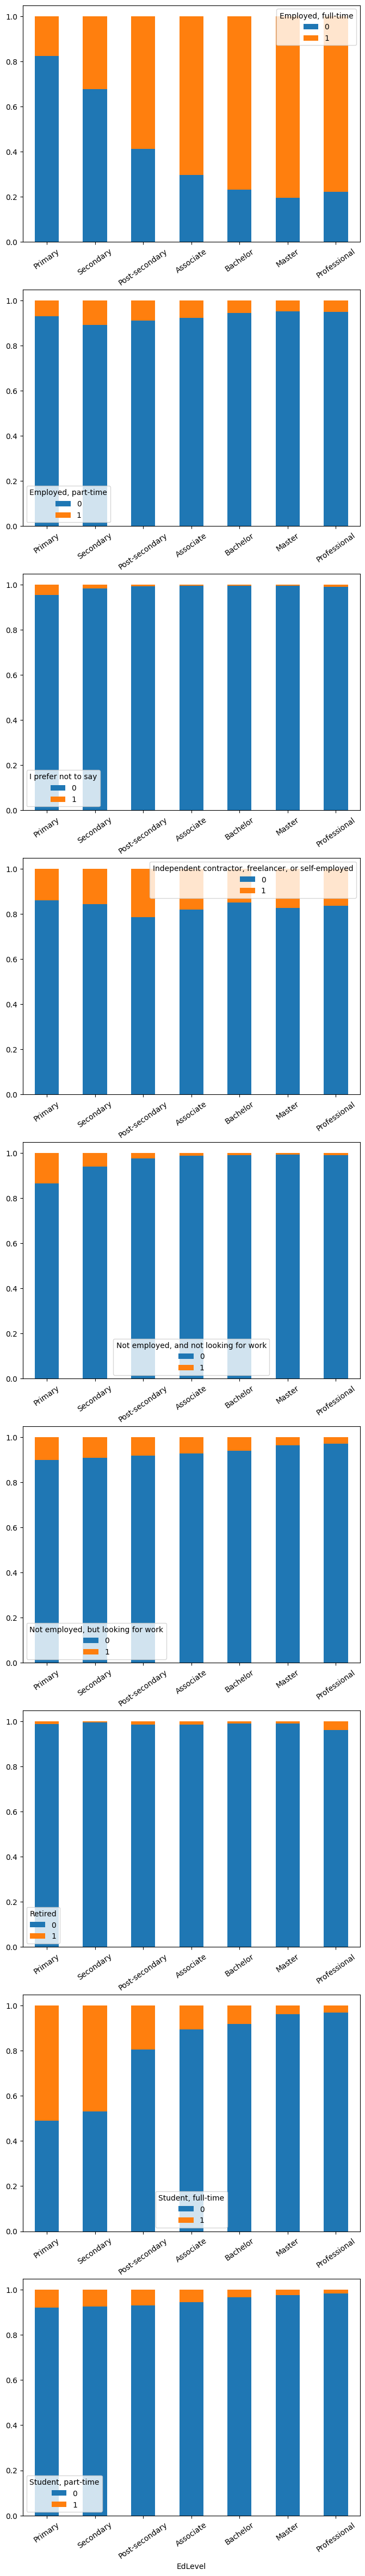

In [150]:
e_types = list(df_encoded.columns)
total = len(e_types)
fig, axes = plt.subplots(nrows=total, ncols=1, figsize=(8, 60))
for idx, name in zip(list(range(total)), e_types):
    ct = pd.crosstab(index=df6['EdLevel'], columns=df6[name], normalize='index').reindex(
        ['Primary','Secondary','Post-secondary', 'Associate', 'Bachelor', 'Master', 'Professional'])
    ct.plot(kind='bar', stacked=True, rot=0, ax=axes[idx])
    axes[idx].tick_params(axis='x', rotation=35)
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [155]:
## Write your code here
df2.to_csv('JobSat_Experience.csv')

In [156]:
df3.to_csv('Employ_Remote.csv')
df4.to_csv('Lang_Country.csv')
country_lang.to_csv('CountryLang.csv')
df5.to_csv('JobSatPt1_Years.csv')
df6.to_csv('Ed_Employ.csv')

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
